In [3]:
import pandas as pd 
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import os
ruta = os.path.abspath(r"C2425-R4\data\processed\peleadores.parquet")
ruta = os.path.join(os.getcwd(), "..", "..", "data", "processed", "peleas.parquet")
df = pd.read_parquet(ruta)
df.head()

,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,KD_A,KD_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,Laverne Clark,Frank Caracci,1999-01-08,LIGHTWEIGHT,False,KO/TKO,412,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Mikey Burnett,Townsend Saunders,1999-01-08,LIGHTWEIGHT,False,Decision - Unanimous,180,2,1,0,...,0,0,1,0,0,0,0,0,0,1
2,Pedro Rizzo,Mark Coleman,1999-01-08,HEAVYWEIGHT,False,Decision - Split,180,2,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Bas Rutten,Tsuyoshi Kohsaka,1999-01-08,HEAVYWEIGHT,False,KO/TKO,135,2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Evan Tanner,Darrel Gholar,1999-01-08,MIDDLEWEIGHT,False,Submission,477,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [5]:
df.columns

Index(['Peleador_A', 'Peleador_B', 'DATE', 'CATEGORY', 'WINNER', 'METHOD',
       'TIME', 'ROUND', 'KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A',
       'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A',
       'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_A_y', 'TOTAL_STR_B_x',
       'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y', 'TD_B_x', 'TD_B_y', 'STR_HEAD_A_x',
       'STR_HEAD_A_y', 'STR_HEAD_B_x', 'STR_HEAD_B_y', 'STR_BODY_A_x',
       'STR_BODY_A_y', 'STR_BODY_B_x', 'STR_BODY_B_y', 'STR_LEG_A_x',
       'STR_LEG_A_y', 'STR_LEG_B_x', 'STR_LEG_B_y', 'STR_DISTANCE_A_x',
       'STR_DISTANCE_A_y', 'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y',
       'STR_CLINCH_A_x', 'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y',
       'STR_GROUND_A_x', 'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y',
       'KD_DIFF', 'SIG_STR_DIFF', 'TD_DIFF', 'SUB_ATT_DIFF', 'REV_DIFF',
       'CTRL_DIFF', 'STRIKER_A', 'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B',
       'TITLE_FIGHT', 'WOMEN', 'Record_

In [6]:
df['SIG_STR_A']

0       0.50
1       0.31
2       0.55
3       0.50
4       0.64
        ... 
7839    0.85
7840    0.70
7841    0.29
7842    0.56
7843    0.39
Name: SIG_STR_A, Length: 7844, dtype: float64

Este análisis te permitirá visualizar la distribución de victorias entre los peleadores A y B. Es útil para entender el balance de los resultados en tu conjunto de datos, es decir, si hay un sesgo hacia uno de los peleadores. Esto puede ser importante para evaluar la equidad de los combates y para ajustar modelos predictivos, asegurando que no estén sesgados hacia uno de los peleadores.

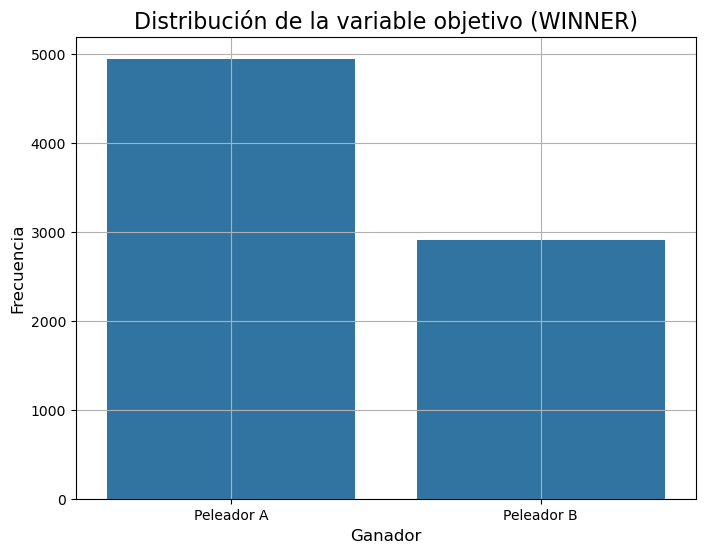

In [7]:
# Visualización de la distribución de la variable objetivo (WINNER)
plt.figure(figsize=(8, 6))
sns.countplot(x='WINNER', data=df)
plt.title('Distribución de la variable objetivo (WINNER)', fontsize=16)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

El gráfico muestra la distribución de victorias entre los peleadores A y B. Observamos que el peleador A gana con una frecuencia cercana a 5000, mientras que el peleador B gana aproximadamente 3000 veces. Este desbalance notable en las victorias sugiere que el peleador A tiene una ventaja competitiva en los datos analizados. Este desbalance debe ser considerado al desarrollar un modelo predictivo, ya que un modelo entrenado en estos datos podría estar sesgado hacia predecir victorias del peleador A con mayor frecuencia. Es importante aplicar técnicas de balanceo de datos, como el sobremuestreo de las victorias del peleador B o el submuestreo de las victorias del peleador A, para asegurar que el modelo sea justo y preciso. Además, sería útil investigar las razones detrás de este desbalance, analizando otras variables como la categoría de peso, el tiempo de combate y las estadísticas de rendimiento para entender mejor por qué el peleador A tiene una tasa de victorias más alta. Este análisis inicial proporciona una base sólida para profundizar en los datos y ajustar el enfoque del modelo predictivo para mejorar su precisión y equidad.

Este análisis sirve para visualizar la distribución de los golpes significativos entre los peleadores A y B según el resultado del combate. Al comparar las densidades de los golpes significativos de los ganadores y perdedores, podemos identificar patrones y diferencias en el rendimiento de los peleadores.

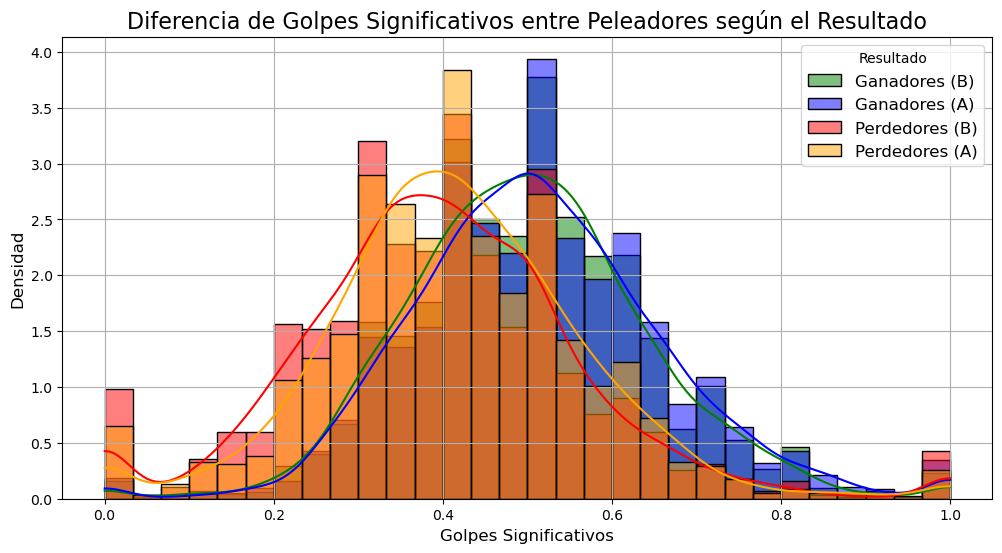

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['WINNER'] == True]['SIG_STR_B'], kde=True, color='green', bins=30, stat="density", label='Ganadores (B)')
sns.histplot(df[df['WINNER'] == False]['SIG_STR_A'], kde=True, color='blue', bins=30, stat="density", label='Ganadores (A)')
sns.histplot(df[df['WINNER'] == False]['SIG_STR_B'], kde=True, color='red', bins=30, stat="density", label='Perdedores (B)')
sns.histplot(df[df['WINNER'] == True]['SIG_STR_A'], kde=True, color='orange', bins=30, stat="density", label='Perdedores (A)')
plt.title("Diferencia de Golpes Significativos entre Peleadores según el Resultado", fontsize=16)
plt.xlabel("Golpes Significativos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(True)
#plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Diferencia de Golpes Significativos entre Peleadores según el Resultado.png')
plt.show()

El gráfico muestra que los ganadores (tanto A como B) tienden a tener una mayor densidad de golpes significativos en comparación con los perdedores. Esto sugiere que la cantidad de golpes significativos es un factor importante en la determinación del ganador de un combate. 

Este análisis compara el promedio de golpes significativos en diferentes zonas del cuerpo (cabeza, cuerpo y piernas) entre los ganadores y perdedores de los combates. Al visualizar estos promedios, podemos identificar patrones y tendencias en las estrategias de los peleadores que conducen a la victoria. El gráfico de barras agrupadas muestra cómo se distribuyen los golpes significativos en cada zona del cuerpo para los ganadores y perdedores, permitiendo una comparación clara y directa entre ambos grupos.

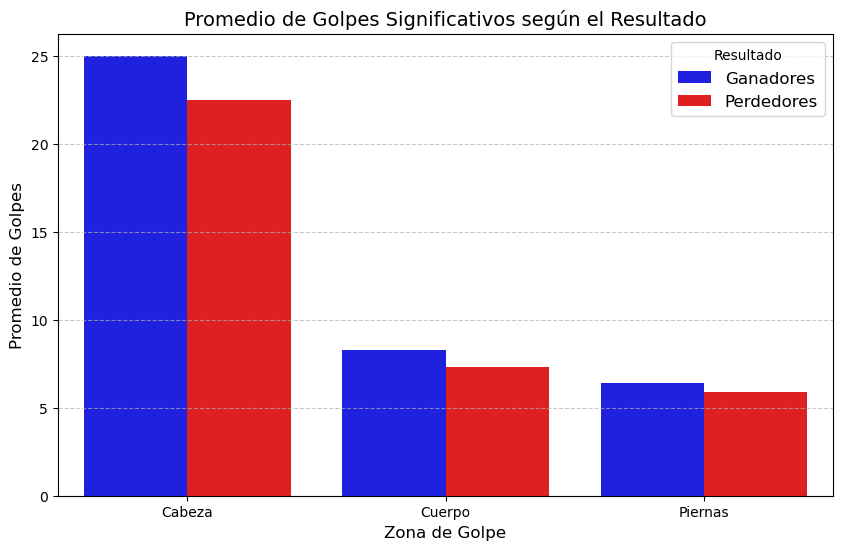

In [9]:
# Calcular el promedio de golpes efectivos en cada zona según el resultado de la pelea
golpes = {
    "Cabeza": ["STR_HEAD_A_x", "STR_HEAD_B_x"],
    "Cuerpo": ["STR_BODY_A_x", "STR_BODY_B_x"],
    "Piernas": ["STR_LEG_A_x", "STR_LEG_B_x"]
}

datos = []
for zona, columnas in golpes.items():
    golpes_ganadores = df[df["WINNER"] == True][columnas].mean().mean()
    golpes_perdedores = df[df["WINNER"] == False][columnas].mean().mean()
    datos.append([zona, "Ganadores", golpes_ganadores])
    datos.append([zona, "Perdedores", golpes_perdedores])

df_plot = pd.DataFrame(datos, columns=["Zona de Golpe", "Resultado", "Promedio de Golpes"])

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x="Zona de Golpe", y="Promedio de Golpes", hue="Resultado", 
            palette={"Ganadores": "blue", "Perdedores": "red"})

# Ajustes visuales
plt.title("Promedio de Golpes Significativos según el Resultado", fontsize=14)
plt.xlabel("Zona de Golpe", fontsize=12)
plt.ylabel("Promedio de Golpes", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Mostrar gráfico
plt.show()

Este análisis muestra que los golpes a la cabeza son los más frecuentes y parecen ser clave para ganar un combate, con los ganadores promediando alrededor de 25 golpes en esta zona. Los golpes al cuerpo y a las piernas son menos frecuentes, con promedios entre 5 y 10 tanto para ganadores como para perdedores. Esto sugiere que la efectividad en los golpes a la cabeza es un indicador importante del éxito en los combates.

La mayor cantidad de golpes significativos en la cabeza está asociada con una mayor probabilidad de ganar un combate, mientras que los golpes al cuerpo y a las piernas tienen un impacto menor en el resultado. 

Este análisis sirve para comparar el número de derribos (knockdowns) realizados por los peleadores A y B según el resultado del combate. Al visualizar estos datos, podemos identificar si hay una relación entre la cantidad de derribos y la probabilidad de ganar un combate.

El primer gráfico muestra el número de derribos realizados por el peleador A en combates ganados y perdidos, mientras que el segundo gráfico hace lo mismo para el peleador B. Estos gráficos permiten comparar la efectividad de los derribos entre los ganadores y perdedores, proporcionando información valiosa sobre la importancia de los derribos en la determinación del resultado de un combate.

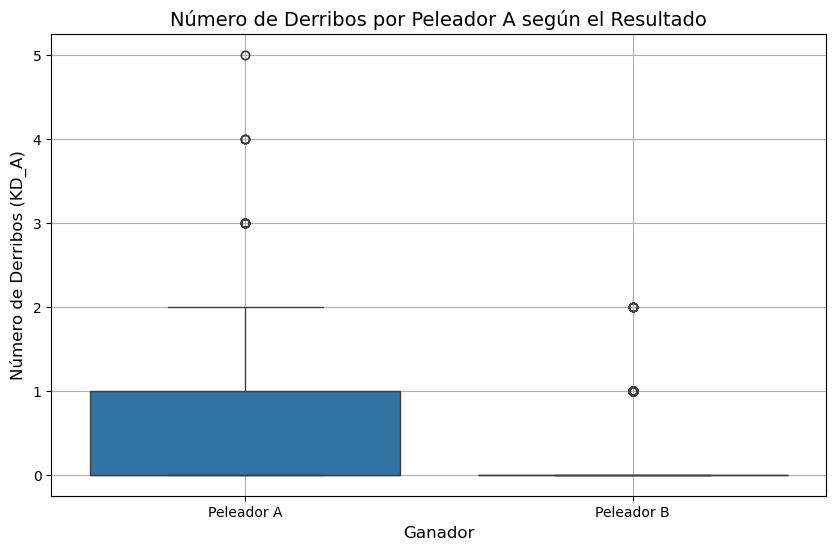

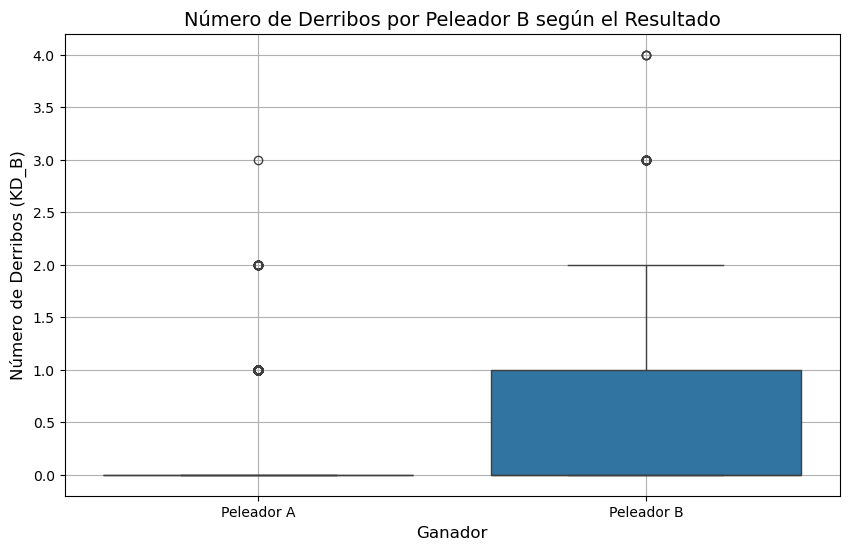

In [10]:
# Número de Derribos por Peleador A según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='KD_A', data=df)
plt.title('Número de Derribos por Peleador A según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Número de Derribos (KD_A)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

# Número de Derribos por Peleador B según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='KD_B', data=df)
plt.title('Número de Derribos por Peleador B según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Número de Derribos (KD_B)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

Este análisis muestra que el ganador de la pelea tiende a realizar un mayor número de derribos. Sin embargo, se observa una diferencia en el comportamiento de los peleadores A y B. El peleador A, cuando gana, realiza un mayor número de derribos en comparación con el peleador B cuando gana. Por otro lado, cuando el peleador A pierde, el peleador B suele realizar algunos derribos adicionales. Esto sugiere que los derribos son un factor importante en la victoria, pero también que el peleador A depende más de los derribos para ganar en comparación con el peleador B. Esta información puede ser útil para ajustar estrategias de combate y mejorar el rendimiento de los peleadores.

Este análisis te permite visualizar y comparar el porcentaje de derribos exitosos (takedowns) de los peleadores A y B según el resultado de la pelea. Al utilizar gráficos de caja (boxplots), puedes identificar la distribución y variabilidad de los porcentajes de derribos exitosos para ambos peleadores, dependiendo de si ganaron o perdieron la pelea. En resumen, con este análisis puedes evaluar el rendimiento de los peleadores en términos de derribos exitosos, ver cómo el porcentaje de derribos exitosos se relaciona con el resultado de la pelea, identificar patrones y tendencias, determinar si hay una diferencia significativa en los porcentajes de derribos exitosos entre los peleadores ganadores y perdedores, y tomar decisiones informadas utilizando esta información para mejorar estrategias de entrenamiento y tácticas de pelea, enfocándose en los aspectos que más influyen en el éxito de los derribos.

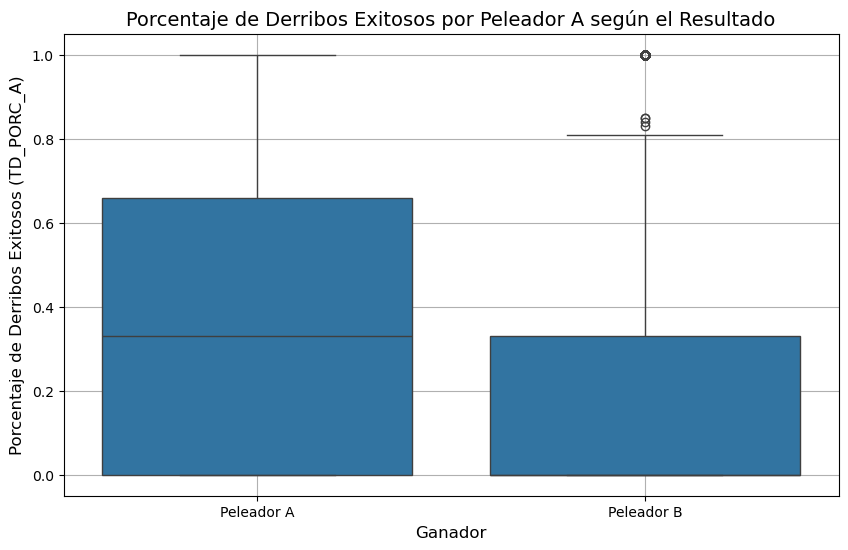

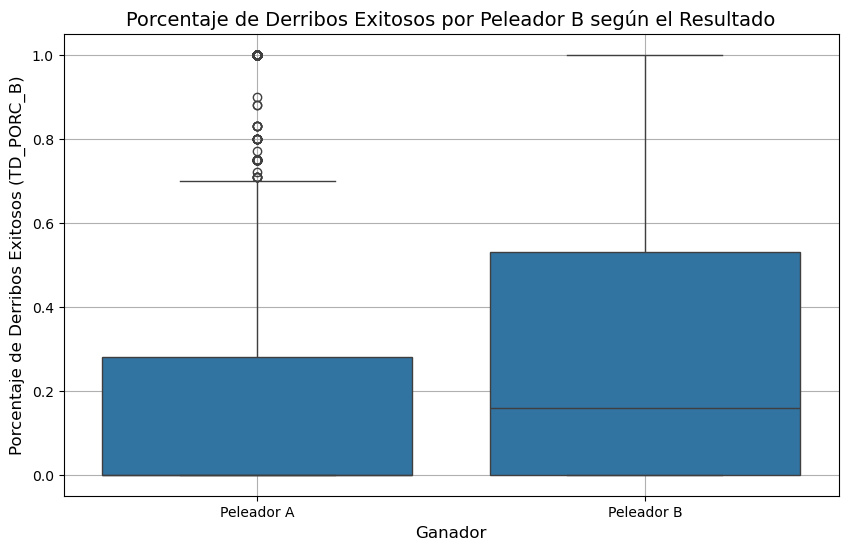

In [11]:
# Porcentaje de Derribos Exitosos por Peleador A según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TD_PORC_A', data=df)
plt.title('Porcentaje de Derribos Exitosos por Peleador A según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Porcentaje de Derribos Exitosos (TD_PORC_A)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

# Porcentaje de Derribos Exitosos por Peleador B según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TD_PORC_B', data=df)
plt.title('Porcentaje de Derribos Exitosos por Peleador B según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Porcentaje de Derribos Exitosos (TD_PORC_B)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

Basándonos en los gráficos, se aprecia que el porcentaje de derribos exitosos del peleador A es mayor cuando gana en comparación con cuando gana el peleador B. Incluso cuando el peleador A pierde, su porcentaje de derribos exitosos en general es mayor que el del peleador B cuando pierde. Esto sugiere que el peleador A es más efectivo en sus intentos de derribo, independientemente del resultado de la pelea. Sin embargo, aunque el peleador A tiene un alto porcentaje de derribos exitosos, esto no siempre se traduce en victorias, lo que indica que otros factores también influyen en el resultado final de la pelea. Por otro lado, el peleador B parece depender menos de los derribos como parte de su estrategia de combate, ya que su porcentaje de derribos exitosos es menor en general. En resumen, el peleador A muestra una mayor eficacia en los derribos, pero esto no siempre garantiza una victoria, lo que resalta la complejidad y la multifactorialidad de las peleas.

Este análisis muestra que el peleador A tiene un mayor tiempo de control en el combate, tanto en victorias como en derrotas, en comparación con el peleador B. Esto sugiere que el peleador A es más dominante en términos de control, pero este factor no siempre garantiza una victoria. El tiempo de control es crucial para dictar el ritmo del combate y ganar puntos, pero otros factores también influyen en el resultado final.

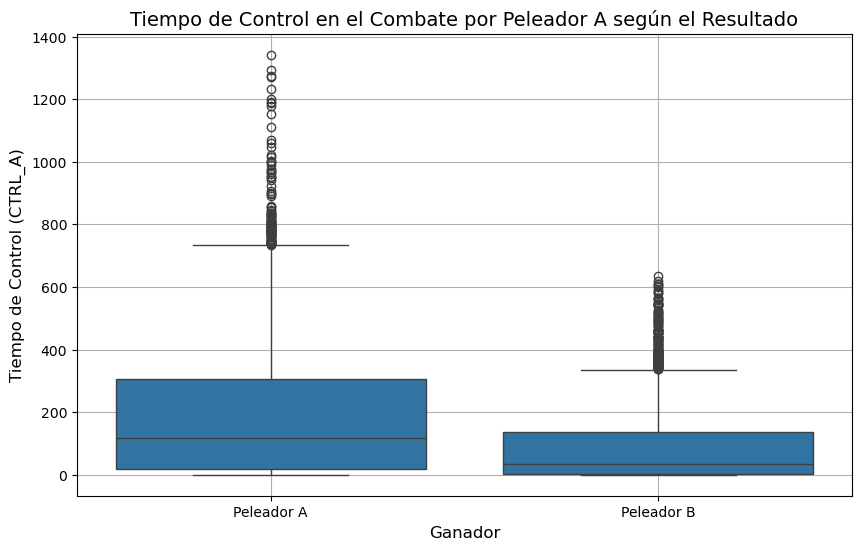

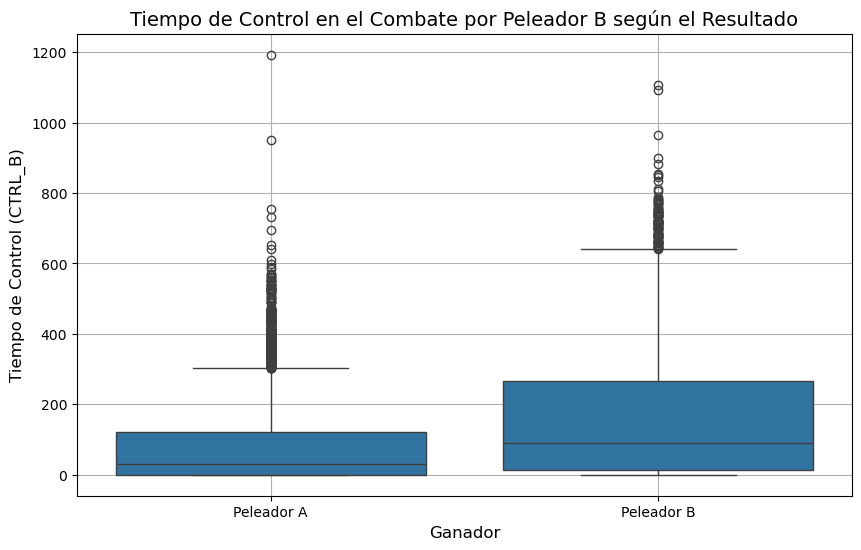

In [12]:
# Tiempo de Control en el Combate por Peleador A según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='CTRL_A', data=df)
plt.title('Tiempo de Control en el Combate por Peleador A según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Tiempo de Control (CTRL_A)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

# Tiempo de Control en el Combate por Peleador B según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='CTRL_B', data=df)
plt.title('Tiempo de Control en el Combate por Peleador B según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Tiempo de Control (CTRL_B)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

Basándonos en los gráficos del tiempo de control en el combate, se observa que el peleador A tiene un mayor tiempo de control tanto cuando gana como cuando pierde, en comparación con el peleador B. Esto sugiere que el peleador A es más dominante en términos de controlar el combate, independientemente del resultado final. Sin embargo, al igual que con los derribos, un mayor tiempo de control no siempre garantiza una victoria, lo que indica que otros factores también juegan un papel crucial en determinar el ganador de la pelea. Por otro lado, el peleador B parece tener menos tiempo de control en general, lo que podría sugerir que su estrategia de combate no se centra tanto en mantener el control del oponente. En resumen, el peleador A muestra una mayor capacidad para controlar el combate, pero esto no siempre se traduce en una victoria, destacando nuevamente la complejidad y la multifactorialidad de las peleas.

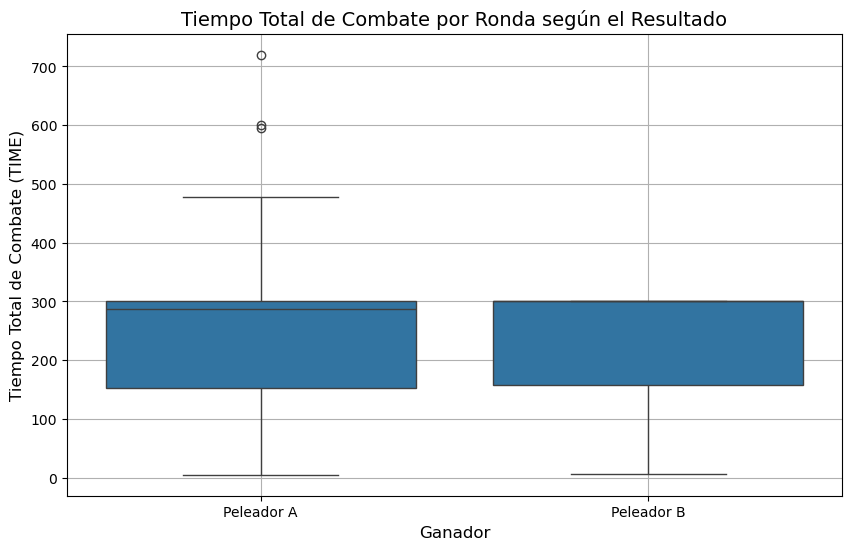

In [13]:

# Tiempo total de combate por ronda según el resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TIME', data=df)
plt.title('Tiempo Total de Combate por Ronda según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Tiempo Total de Combate (TIME)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

En conclusión, el gráfico muestra que el tiempo medio de pelea es bastante similar independientemente de quién gane. Sin embargo, se observa que en varias peleas ganadas por el peleador A, la duración ha sido mayor de lo normal. Esto sugiere que el peleador A puede tener una mayor capacidad de resistencia y estrategia a largo plazo, permitiéndole mantener un rendimiento efectivo durante peleas más prolongadas. Esta capacidad de alargar el combate podría ser una ventaja táctica, permitiendo al peleador A desgastar a su oponente y asegurar la victoria en peleas más largas.

Este análisis de la diferencia de control en el combate según el resultado es útil para entender cómo la capacidad de un peleador para mantener el control del combate en comparación con su oponente influye en el resultado final. La diferencia de control (CTRL_DIFF) mide la diferencia en el tiempo de control entre los dos peleadores. Al comparar esta diferencia entre los ganadores y perdedores, podemos obtener información sobre la importancia del control en el combate para asegurar la victoria. Un mayor valor de CTRL_DIFF para los ganadores sugiere que mantener un control dominante sobre el oponente es un factor clave para ganar la pelea. Este análisis proporciona una visión valiosa sobre la dinámica del control en el combate y su impacto en los resultados.

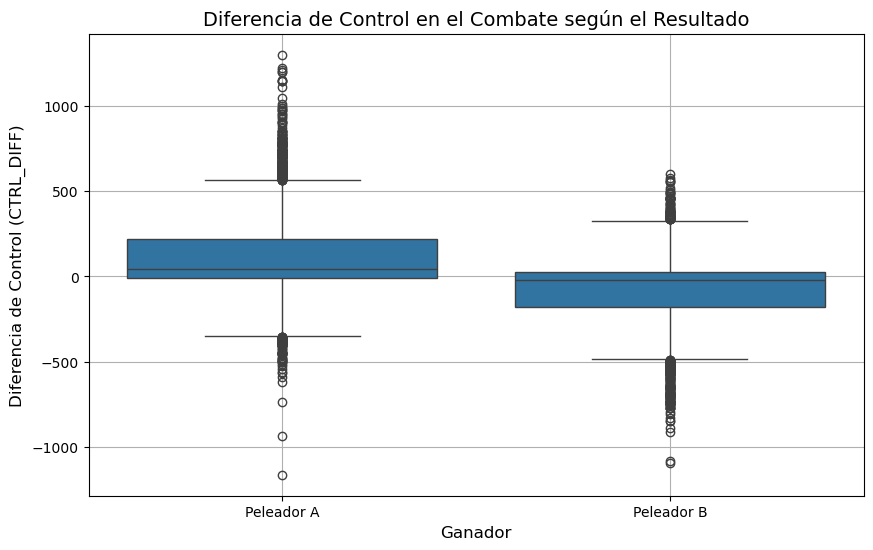

In [14]:
# Diferencia de Control en el Combate por Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='CTRL_DIFF', data=df)
plt.title('Diferencia de Control en el Combate según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Diferencia de Control (CTRL_DIFF)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

En conclusión, el gráfico muestra que en la mayoría de las peleas ganadas por el peleador A, la diferencia de control ha sido positiva, indicando un dominio claro en términos de mantener el control del combate. Sin embargo, en ciertos combates puntuales, esta diferencia ha sido menor. Por otro lado, cuando el peleador B ha sido el ganador, aunque también ha tenido una diferencia de control positiva en la mayoría de los casos, no ha sido tan dominante como el peleador A. Esto sugiere que el peleador A tiende a ganar peleas en las que puede mantener un control significativo sobre su oponente, mientras que el peleador B puede ganar incluso sin un dominio tan claro en el control del combate.

Este análisis de la diferencia de intentos de sumisión según el resultado es útil para entender cómo la agresividad en la búsqueda de sumisiones influye en el resultado de la pelea. La diferencia de intentos de sumisión (SUB_ATT_DIFF) mide la diferencia en el número de intentos de sumisión entre los dos peleadores. Al comparar esta diferencia entre los ganadores y perdedores, podemos obtener información sobre la importancia de los intentos de sumisión en el combate. Un mayor valor de SUB_ATT_DIFF para los ganadores sugiere que ser más agresivo en la búsqueda de sumisiones puede ser un factor clave para asegurar la victoria. Este análisis proporciona una visión valiosa sobre la dinámica de los intentos de sumisión en el combate y su impacto en los resultados.

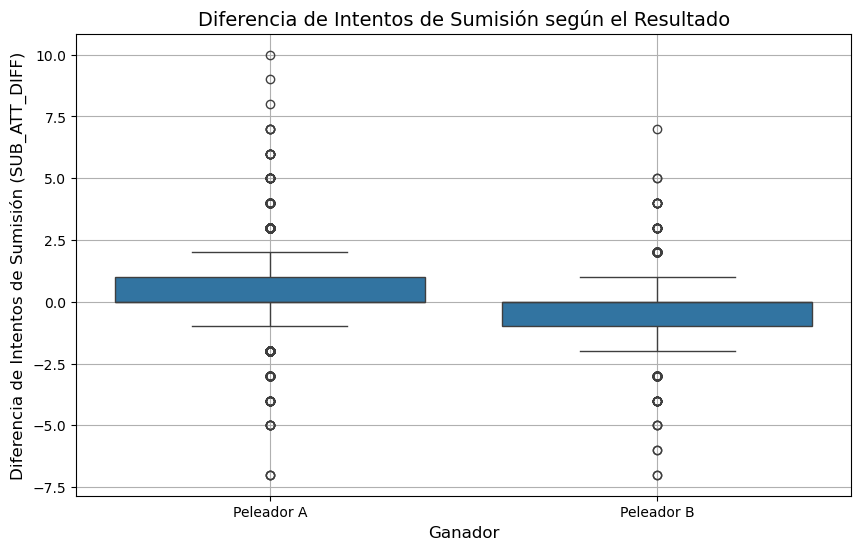

In [15]:
# Diferencia de Intentos de Sumisión por Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='SUB_ATT_DIFF', data=df)
plt.title('Diferencia de Intentos de Sumisión según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Diferencia de Intentos de Sumisión (SUB_ATT_DIFF)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

En conclusión, los gráficos muestran que la diferencia de intentos de sumisión es similar para ambos peleadores en general. Sin embargo, en ciertas peleas ganadas por el peleador A, la diferencia de intentos de sumisión ha sido significativamente mayor que en las peleas ganadas por el peleador B. Esto sugiere que, aunque ambos peleadores tienen una agresividad comparable en la búsqueda de sumisiones, el peleador A ha tenido momentos en los que ha sido especialmente dominante en este aspecto, lo que podría haber contribuido a su éxito en esas peleas específicas.

Este análisis de la diferencia de derribos según el resultado es útil para entender cómo la capacidad de un peleador para realizar derribos influye en el resultado de la pelea. La diferencia de derribos (TD_DIFF) mide la diferencia en el número de derribos exitosos entre los dos peleadores. Al comparar esta diferencia entre los ganadores y perdedores, podemos obtener información sobre la importancia de los derribos en el combate. Un mayor valor de TD_DIFF para los ganadores sugiere que ser más efectivo en los derribos puede ser un factor clave para asegurar la victoria. Este análisis proporciona una visión valiosa sobre la dinámica de los derribos en el combate y su impacto en los resultados.

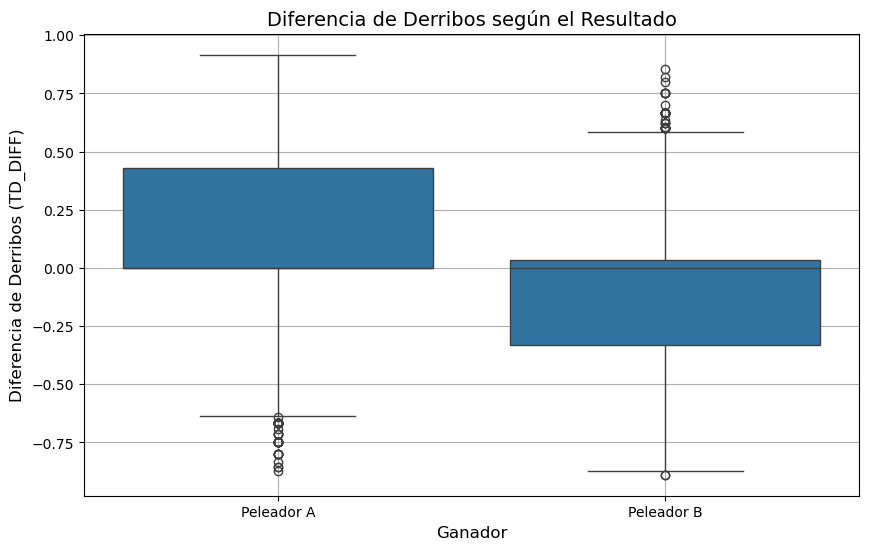

In [16]:
# Diferencia de Derribos por Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TD_DIFF', data=df)
plt.title('Diferencia de Derribos según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Diferencia de Derribos (TD_DIFF)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.show()

En conclusión, el gráfico muestra que cuando un peleador gana, la diferencia de derribos (TD_DIFF) está a su favor. Sin embargo, la media del peleador A es positiva en todos los casos, lo que sugiere que el peleador A tiene una capacidad superior para realizar derribos, independientemente del resultado de la pelea. Esto indica que el peleador A es consistentemente más efectivo en los derribos, lo que podría ser un factor clave en su estrategia de combate y en su capacidad para dominar a sus oponentes.

Este análisis de la matriz de correlación entre etiquetas seleccionadas es útil para identificar las relaciones y dependencias entre diferentes variables en tu conjunto de datos. Al visualizar la correlación entre variables como derribos, golpes significativos, tiempo de control y otros factores, puedes obtener información valiosa sobre cómo estas variables se influyen mutuamente y cuáles son los factores más importantes que contribuyen al resultado de una pelea.

Por ejemplo, una alta correlación positiva entre dos variables sugiere que cuando una variable aumenta, la otra también tiende a aumentar. Por otro lado, una alta correlación negativa indica que cuando una variable aumenta, la otra tiende a disminuir. Este tipo de análisis puede ayudarte a identificar patrones y tendencias en los datos, lo que puede ser útil para desarrollar estrategias de combate, mejorar el rendimiento de los peleadores y tomar decisiones informadas basadas en datos.

En resumen, la matriz de correlación te proporciona una visión clara de las relaciones entre diferentes variables, lo que puede ayudarte a entender mejor la dinámica de las peleas y a identificar los factores clave que influyen en los resultados.

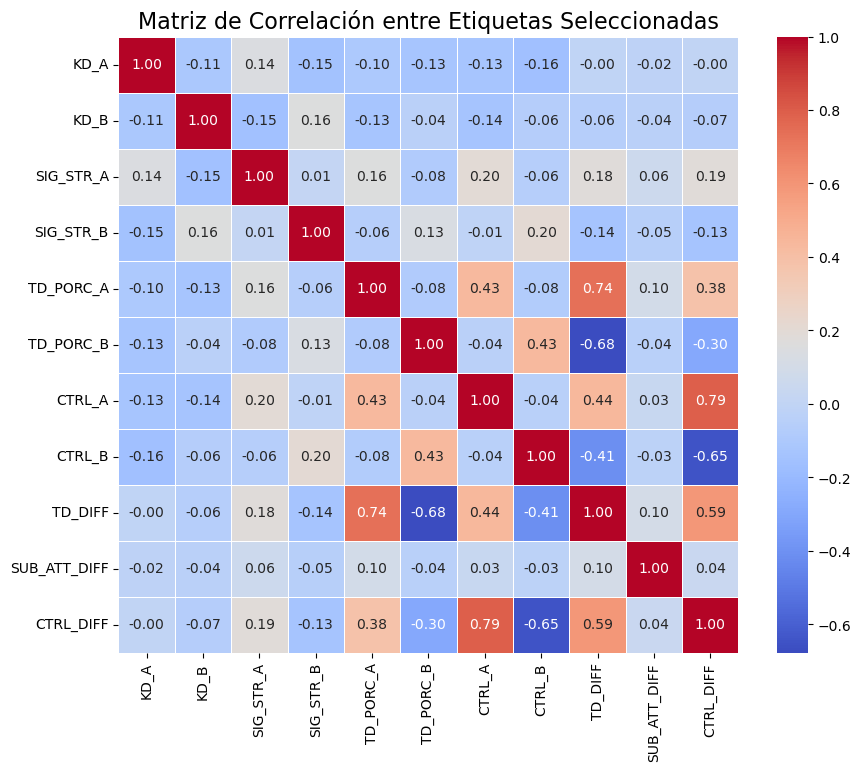

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Seleccionar un subconjunto de columnas relevantes para la correlación
columns_subset = ['KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'CTRL_A', 'CTRL_B', 'TD_DIFF', 'SUB_ATT_DIFF', 'CTRL_DIFF']
subset_df = numeric_df[columns_subset]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear un mapa de calor de la matriz de correlación con un tamaño más pequeño y sin anotaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Etiquetas Seleccionadas', fontsize=16)
plt.show()